# Introduction

Seaborn est une librarie qui offre une surcouche par rapport à matplotlib. Son principal intérêt est de permettre de faire rapidement des graphiques qui seraient difficiles à réaliser avec matplotlib. On peut noter par exemple:
- Des graphiques par catégories, en particulier les Boxplots et scatterplots
- Des Heatmaps
- Des distributions croisées de variables continues

Le graphique créé par Seaborn est un "Axe" Matplotlib, on peut donc le travailler comme on a l'habitude avec nos outils matplotlib.

Seaborn a aussi un interet graphique car il propose des thèmes et des palettes standardisées 

Il faut comprendre que les fonctions de graphe dans Seaborn sont de deux types différents:
- Figure-level (seaborn.axisgrid.Facetgrid). C'est un objet propre à Seaborn qui a des avantages mais dont la documentations est moins fournies et plus complexe
- Axe-level (matplotlib.axes_subplots.AxesSubplot). C'est un objet Matplotlib donc compatible avec ce package et pour lequel on connait déja de nombreuses options de mise en forme. 

Il est conseillé dans un premier temps de garder le stack Seaborn-Axe-level / Matplotlib-Orienté-objet. Mais investir dans la documentation de Seaborn peut permettre de faire certaines choses plus rapidement.

Sur la figure suivante les plots du dessus sont figure-level, ceux du dessous, Axe-level.

plus d'information [ici](https://towardsdatascience.com/a-major-seaborn-plotting-tip-i-wish-i-had-learned-earlier-d8209ad0a20e)

![différents graphiques](https://seaborn.pydata.org/_images/function_overview_8_0.png)

# Mise en place

Nous devons dans un premier temps installer deux packages:
- matplotlib qui est l'outil de base pour faire des graphiques ("pip3 install matplotlib" dans le terminal)
- seaborn, une couche supplémentaire qui permet facilement aux graphiques d'être beaux ("pip3 install seaborn")

On importe à présent les packages installés:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Enfin on importe la donnée

In [2]:
# On importe des données d'exemple contenues directement dans la bibliothèque Seaborn
tips = sns.load_dataset("tips")

In [3]:
# Et on l'explore rapidement
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Généralités sur les graphiques seaborn

On peut tout de suite faire un premier graphique de type relationnel un relplot

Mais peu importe le type de plot on retrouve pratiquement toujours ces paramètres:
- data: le dataset utilisé
- x: axe des abscisse
- y: axe des ordonnés

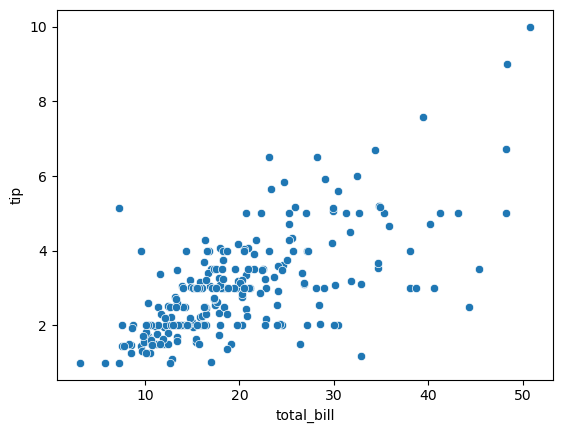

In [4]:
g =sns.scatterplot(data=tips,x="total_bill", y="tip")

On voit que sur ce graphique le pourboire est proportionnel au prix d'une addition. Il est cependant possible d'améliorer ce graphique

<class 'matplotlib.axes._subplots.AxesSubplot'>


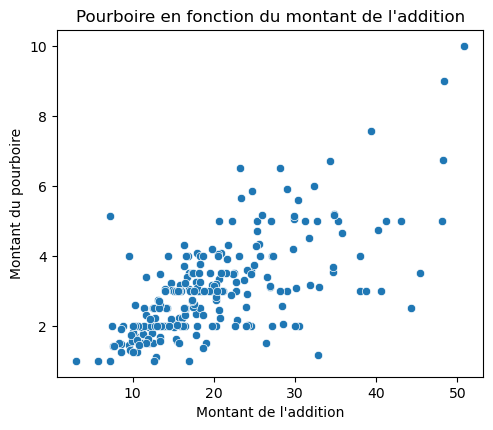

In [7]:
g = sns.scatterplot(data=tips,x="total_bill", y="tip")


print(type(g))

g.set(title = "Pourboire en fonction du montant de l'addition", xlabel="Montant de l'addition", ylabel="Montant du pourboire")
g.figure.set_size_inches(5.5, 4.5)

## Ajouter une dimension

On peut ajouter une dimension, c'est à dire croiser nos graphiques avec une variable supplémentaire.
Est ce que les hommes donnent plus de pourboires que les femmes?

Il y a trois paramètres pour ajouter cette dimension, il faut choisir l'un des trois:
- hue: modifie la couleur
- style: modifie le type de point
- size: modifie la taille
- col, row: distribuent la dimension sur plusieurs axes

`hue` permet de varier la couleur, on le couple avec le paramètre [palette](https://seaborn.pydata.org/tutorial/color_palettes.html) pour choisir les couleurs

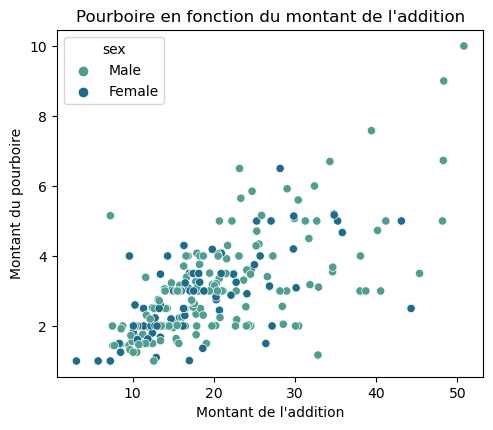

In [8]:
g =sns.scatterplot(
    data=tips,
    x="total_bill", y="tip",
    hue="sex", palette="crest"
)
g.set(title = "Pourboire en fonction du montant de l'addition", xlabel="Montant de l'addition", ylabel="Montant du pourboire")
g.figure.set_size_inches(5.5, 4.5)

## Exemple de l'usage du figure level

`col` et `row` permettent d'afficher l'information sur plusieurs lignes et colonnes

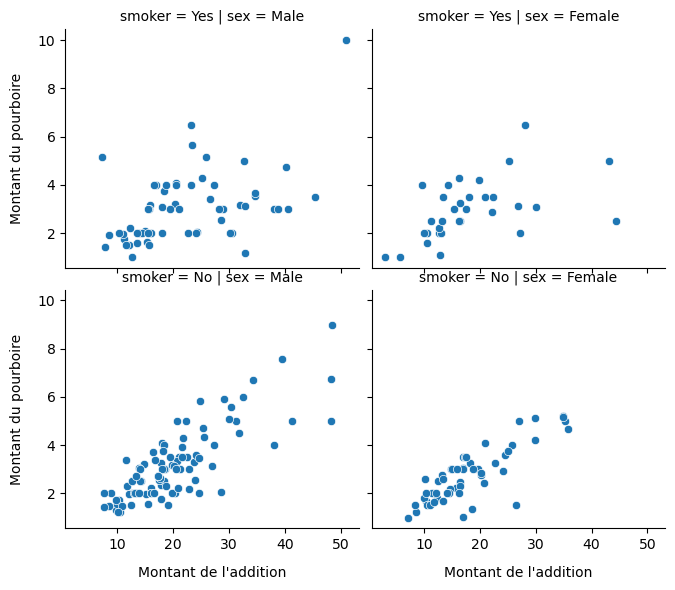

In [10]:
g =sns.relplot(
    kind="scatter",
    data=tips,
    x="total_bill", y="tip",
    col="sex", row="smoker"
)
g.set_axis_labels("Montant de l'addition", "Montant du pourboire", labelpad=10)
g.figure.set_size_inches(6.5, 5.5)

## Exercices:

**`Exercice`**: 
On reprend la table airBNB
- affichez le service fees en fonction du prix à l'aide d'un lineplot et déduisez en comment sont calculés les services fees 
- affichez le nombre d'annonce validée ou non à l'aide d'un countplot.
- affichez la distribution (répartition des valeurs) de l'année de construction  en utilisant un histplot
- affichez le prix à l'aide d'un boxplot.
- affichez le prix moyen par type de chambre en utilisant un barplot


In [3]:
# On utilise la fonction read_csv et on indique le chemin relatif
df_air_bnb = pd.read_csv("data/Airbnb_Open_Data.csv")

/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_82429/1119183766.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_air_bnb = pd.read_csv("data/Airbnb_Open_Data.csv")
